
# Project: Investigating tmdb-movies dataset

<a id='intro'></a>
## Introduction

> The dataset is about movies released between 1960 to 2015. This dataset contains release years, directors, budget, revenue, cast, title, production companies, genres and many more.
>
> This investigation will show what variables have the role to play in determine the revenues. To check what factor helps in having high revenues.


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [1]:
#importing all the liberies we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Here, we load the dataset. We check the dataset size,info and for null values in the dataset.

### General Properties

In [2]:
#using pandas to read the csv file
df = pd.read_csv('tmdb-movies.csv', sep=',')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
#we find the null values in each coumns with the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> the .describe() gives us the first analysis breakdown of our data. we can get the count,mean, max and so on with it.

### Data Cleaning 
>We drop all columns which will not be usefull in our analysis.
>Also, we drop all null values in the dataset.
>
>We are dropping some colums because they will not be useful to the analysis. They have too many non generic values.
>
>Split columns like production companies and genres which will have a vital role for the analysis to come.

In [6]:
#dropping some columns due to many non generic values
df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview'], axis = 1, inplace = True)
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [7]:
#checking for null values
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
df.shape

(10866, 15)

In [9]:
#dropping all null values
df.dropna(inplace=True)

In [10]:
df.shape

(9773, 15)

In [11]:
#checking for null values
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [12]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Data Wrangling
>Here, we split columns with many values in a cell. 
>
> columns like production comapnies and genres.
>
>Splitting these columns helps to achieve better analysis e.g Genres vs revenue analysis 

In [13]:
##expanding the genres
df=df.drop('genres', axis=1).join(df['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genres'))

In [14]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action


In [15]:
#resetting the index
df=df.reset_index(drop=True)

In [16]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
2,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
3,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
4,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action


In [17]:
df['genres'].unique()

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

In [18]:
df['genres'].nunique()

20

In [19]:
#expanding the production companies
df=df.drop('production_companies', axis=1).join(df['production_companies'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('production_companies'))

In [20]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres,production_companies
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Universal Studios
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Amblin Entertainment
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Legendary Pictures
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Fuji Television Network
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Dentsu


In [21]:
df=df.reset_index(drop=True)

In [22]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres,production_companies
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Universal Studios
1,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Amblin Entertainment
2,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Legendary Pictures
3,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Fuji Television Network
4,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Dentsu


In [23]:
df.shape

(58971, 15)

<a id='eda'></a>
## Exploratory Data Analysis

> Check the value count for some independent variables.
>
>the independent variables will be comapring with the dependant variable are (genres, production companies, director and release year.
>
> Those independent varaibles will help figure out why some movies have high revenue and others have low revenue.
>
>Start grouping by to determine how the independent variables affect the dependent variable(Revenue).



In [24]:
#the total times each uniques genres appear in out dataset
df.genres.value_counts()

Drama              10713
Comedy              7491
Thriller            7193
Action              5719
Romance             3649
Horror              3526
Crime               3421
Adventure           3402
Science Fiction     2726
Family              2222
Fantasy             2025
Mystery             2005
Animation           1223
History              856
Music                730
War                  706
Documentary          574
Western              336
Foreign              235
TV Movie             219
Name: genres, dtype: int64

In [25]:
##the total times each uniques production companies appear in out dataset
df.production_companies.value_counts()

Warner Bros.                              1418
Universal Pictures                        1374
Paramount Pictures                        1146
Twentieth Century Fox Film Corporation     816
Columbia Pictures                          746
                                          ... 
PathÃ©!                                      1
Tohokushinsha                                1
Bee Holder Productions                       1
Royal Oak Films                              1
Norm-Iris                                    1
Name: production_companies, Length: 7842, dtype: int64

In [26]:
##the total times each uniques director appear in our dataset
df.director.value_counts()

Ridley Scott                  250
Clint Eastwood                245
Steven Spielberg              241
Woody Allen                   179
Steven Soderbergh             178
                             ... 
Karzan Kader                    1
Ryan Polito|Jake Szymanski      1
Zak Levitt                      1
AnaÃ¯s Barbeau-Lavalette        1
Harold P. Warren                1
Name: director, Length: 4505, dtype: int64

In [27]:
#checking for no missing values and data type of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58971 entries, 0 to 58970
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            58971 non-null  float64
 1   budget                58971 non-null  int64  
 2   revenue               58971 non-null  int64  
 3   original_title        58971 non-null  object 
 4   cast                  58971 non-null  object 
 5   director              58971 non-null  object 
 6   runtime               58971 non-null  int64  
 7   release_date          58971 non-null  object 
 8   vote_count            58971 non-null  int64  
 9   vote_average          58971 non-null  float64
 10  release_year          58971 non-null  int64  
 11  budget_adj            58971 non-null  float64
 12  revenue_adj           58971 non-null  float64
 13  genres                58971 non-null  object 
 14  production_companies  58971 non-null  object 
dtypes: float64(4), int6

In [28]:
#which year more movies was released?
df.release_year.value_counts()

2014    3645
2009    3329
2013    3231
2015    3214
2008    3000
2011    2996
2012    2870
2010    2801
2007    2736
2006    2456
2005    2316
2004    1972
2002    1813
2003    1736
2001    1540
1999    1289
1998    1195
2000    1193
1997    1116
1996    1079
1995     953
1994     944
1993     905
1992     788
1991     664
1990     662
1989     658
1988     639
1987     600
1986     563
1984     551
1985     526
1982     368
1983     344
1981     333
1980     323
1978     296
1973     245
1979     235
1975     225
1977     225
1976     223
1974     223
1971     221
1966     184
1970     178
1964     175
1968     172
1967     164
1972     142
1963     135
1965     131
1969     126
1960     116
1962     109
1961      98
Name: release_year, dtype: int64

In [29]:
##which year and genres of movies was released the most?
df[['release_year', 'genres']].value_counts()

release_year  genres     
2014          Drama          745
2013          Drama          634
2015          Drama          626
2009          Drama          580
2008          Drama          573
                            ... 
1997          TV Movie         1
1969          Mystery          1
2000          TV Movie         1
1977          Documentary      1
1963          Animation        1
Length: 1042, dtype: int64

In [30]:
#which production companies produced the most genres of movies?
df[['production_companies', 'genres']].value_counts()

production_companies    genres         
Warner Bros.            Drama              256
Universal Pictures      Comedy             242
Paramount Pictures      Drama              198
Universal Pictures      Drama              194
Warner Bros.            Action             177
                                          ... 
Guber/Peters Company    Crime                1
                        Comedy               1
Guardian Trust Company  Thriller             1
                        Science Fiction      1
í”„ë¡œë•ì…˜M            Action               1
Length: 28064, dtype: int64

In [31]:
df.describe().revenue

count    5.897100e+04
mean     6.441623e+07
std      1.524440e+08
min      0.000000e+00
25%      0.000000e+00
50%      2.395231e+06
75%      6.007260e+07
max      2.781506e+09
Name: revenue, dtype: float64

In [32]:
##genres that genrates more revenue
df.groupby('genres').sum().revenue

genres
Action             553992297756
Adventure          492547075119
Animation          119012575592
Comedy             374559883469
Crime              180070080643
Documentary          2210765875
Drama              424376239508
Family             223889866703
Fantasy            277862622265
Foreign               501943694
History             37751217713
Horror              82697867168
Music               30447467510
Mystery            103524479991
Romance            169765663888
Science Fiction    273671820701
TV Movie              126000000
Thriller           392938422432
War                 44829522148
Western             13913956911
Name: revenue, dtype: int64

In [33]:
#production comapnies that genrates more revenue
df.groupby('production_companies').sum().revenue

production_companies
"DIA" Productions GmbH & Co. KG      88701852
# Lexyn Productions                         0
10 West Studios                             0
100 Feet Productions                        0
1019 Entertainment                    8404524
                                      ...    
uFilm                               400317765
uFund                                       0
verture Films                               0
Ã–sterreichischer Rundfunk (ORF)        11294
í”„ë¡œë•ì…˜M                                0
Name: revenue, Length: 7842, dtype: int64

In [34]:
#which genres of movies was released more per year
df.groupby('genres').apply(lambda x: x['release_year'].value_counts().idxmax())

genres
Action             2014
Adventure          2009
Animation          2010
Comedy             2009
Crime              2013
Documentary        2014
Drama              2014
Family             2006
Fantasy            2009
Foreign            2008
History            2008
Horror             2015
Music              2015
Mystery            2009
Romance            2008
Science Fiction    2015
TV Movie           2015
Thriller           2014
War                2014
Western            2015
dtype: int64

In [35]:
#find out which director makes different genres of movies more?
df.groupby('genres').apply(lambda x: x['production_companies'].value_counts().idxmax())

genres
Action                                       Warner Bros.
Adventure                                    Warner Bros.
Animation                            Walt Disney Pictures
Comedy                                 Universal Pictures
Crime                                        Warner Bros.
Documentary                             Participant Media
Drama                                        Warner Bros.
Family                               Walt Disney Pictures
Fantasy                                      Warner Bros.
Foreign                               UTV Motion Pictures
History                                Universal Pictures
Horror                                 Universal Pictures
Music                                        Warner Bros.
Mystery                                      Warner Bros.
Romance                                Universal Pictures
Science Fiction    Twentieth Century Fox Film Corporation
TV Movie                                   Disney Channel
Thrille

In [36]:
#which director directed a genre of movies more?
df.groupby('genres').apply(lambda x: x['director'].value_counts().idxmax())

genres
Action                 Ridley Scott
Adventure            Richard Donner
Animation                 Jay Oliva
Comedy                  Woody Allen
Crime                Clint Eastwood
Documentary           Michael Moore
Drama                Clint Eastwood
Family                   Shawn Levy
Fantasy                  Tim Burton
Foreign            Paddy Breathnach
History                Oliver Stone
Horror                   Wes Craven
Music                   Alan Parker
Mystery               David Fincher
Romance                 Woody Allen
Science Fiction    David Cronenberg
TV Movie                  Paul Hoen
Thriller                 Tony Scott
War                Steven Spielberg
Western                Burt Kennedy
dtype: object

In [37]:
#how does genres and vote_average affect the revenue?
df.groupby(['genres','vote_average']).agg({'revenue':sum})

revenue
genres  vote_average            
Action  1.5                    0
        2.0                    0
        2.2               147412
        2.4                    0
        2.5                    0
...                          ...
Western 7.2           2728510260
        7.3            964927826
        7.4            467280351
        7.5            159157447
        7.7            850736476

[966 rows x 1 columns]

### seperating the vote average into high and low votes
>Then we find which votes generate more revenues 

In [38]:
df.vote_average.max(), df.vote_average.min(), df.vote_average.median()


(8.7, 1.5, 6.0)

In [39]:
#the following codes explain how ratings affect revenues of movies

In [40]:
low_votes = df.query('vote_average < 6.0')

In [41]:
high_votes = df.query('vote_average >= 6.0')

In [42]:
low_votes.groupby(['vote_average']).agg({'revenue':sum})

,revenue
vote_average,
1.5,0
2.0,0
2.1,36437288
2.2,589648
2.3,0
2.4,0
2.5,0
2.6,0
2.7,0


In [43]:
high_votes.groupby(['vote_average']).agg({'revenue':sum})

,revenue
vote_average,
6.0,156663042594
6.1,221925536802
6.2,176938359306
6.3,172398023743
6.4,198164226994
6.5,261317610901
6.6,184850000814
6.7,134372938751
6.8,112776847680


In [44]:
#which votes generate more revenue?
high_votes['revenue'].sum(), low_votes['revenue'].sum()

(2799115784337, 999573984749)

Text(0.5, 1.0, 'Genres of movies')

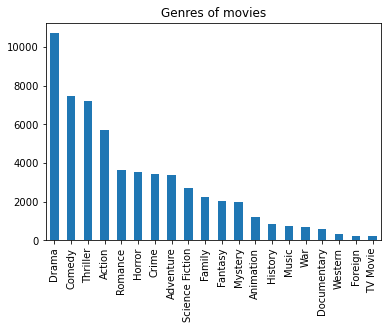

In [45]:
#visualization on genres
df['genres'].value_counts().plot(kind='bar')
plt.title('Genres of movies')

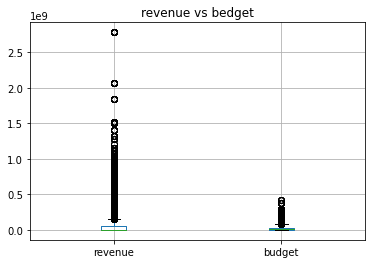

In [46]:
#boxplot on revenue and budegt
dfplt = df.boxplot(column = ['revenue', 'budget'])
dfplt.plot()
plt.title('revenue vs bedget')
plt.show()

In [47]:
df.revenue.max()

2781505847

In [48]:
df.revenue.min()

0

In [49]:
df.revenue.mean()

64416234.57438402

In [50]:
df.revenue.sum()

3798689769086

In [51]:
#the year most revenue was generated
df.groupby('release_year').sum().revenue

release_year
1960       541830000
1961      1367127692
1962       916959692
1963      1401896980
1964      1634608770
1965      2601903966
1966       407736689
1967      3192547034
1968      1968078064
1969      2143859546
1970      2744402113
1971      2815749998
1972      1927624527
1973      7105584377
1974      4649720349
1975      5170337676
1976      3791445626
1977     11577719579
1978      7605585756
1979      6915033125
1980      8055447686
1981      7370797308
1982     14309153393
1983     12349362153
1984     18744602037
1985     17648485973
1986     14651251857
1987     20957728435
1988     22661388391
1989     27837067364
1990     29762203929
1991     38156870254
1992     39696243301
1993     40041533773
1994     44118921670
1995     59351743047
1996     51558514346
1997     86054912932
1998     77457859130
1999     80681191039
2000     83197802944
2001    128321247079
2002    129377664926
2003    142402310481
2004    173124776931
2005    165731031607
2006    154084032318


In [52]:
df.groupby('director').sum().revenue

director
 FrÃ©dÃ©ric Jardin                67160
A. Todd Smith                         0
Aaron Blaise|Robert Walker         2000
Aaron Hann|Mario Miscione             0
Aaron Harvey                          0
                                ...    
Ã‡aÄŸan Irmak                         0
Ã‰mile Gaudreault               6063602
Ã‰ric Besnard                         0
Ã‰tienne Chatiliez                    0
Ã€lex Pastor|David Pastor     116048440
Name: revenue, Length: 4505, dtype: int64

<a id='conclusions'></a>
## Conclusions

#### The findings of the analysis is listed below
>
>More drama movies was in the dataset
>
>Warner Bros. released more movies than other companies
>
>Ridley Scott direct more movies than other directors
>
>More movies was released in 2014 compared to other years 
>
>High rated movies generate more revenue than low rated movies
>
>Action movies generate higher revenue compared to other genres of movies
>
>Different genres of movies was released in particular years than others like action movies in 2014, fantasy movies in 2008.
>
>Production companies released genres of movies than others like Warner Bros. for action movies, Universal Pictures for Horror movies.
>
>2015 generated more revenue than other years 


## Limitations


>
>Most of variables are categorical data
>
>Most of the categorical data we have more data points within a cell. I had to seperate them to make our analysis more suitable which made our data more heavy.
>
>Visualization takes alot of time due to the heavy dataset. 
